# Modelo de clasificación de accidentalidad laboral mediante redes neuronales

**Elias Buitrago Bolivar** <br>
*Bogotá, Colombia* <br>
*7/abril/2021* <br>

## Cargar librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from tensorflow.keras import utils as np_utils
from sklearn.metrics import recall_score
import tensorflow as tf



C:\Users\ebuit\miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ebuit\miniconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\ebuit\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ebuit\miniconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\ebuit\miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\ebuit\miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ebuit\miniconda3\lib\site-packages\tensorflow\python\framew

## Cargar datos

In [95]:
#Cargar datos para el modelo
#En PowerBI se creo un nuevo dataset a partir de los datos original con el objetivo de filtrar variables de interés.
col_names = ['id_trabajador', 'edad', 'genero', 'nivel_educativo', 'num_hijos', 
             'tipo_cargo', 'capacitado', 'jornada', 'antiguedad', 'id_empresa', 
             'accidentado', 'id_accidente', 'parte_del_cuerpo', 'lesion', 
             'sector_economico', 'tipo_empresa', 'sistema_gestion']
trabajadores_full = pd.read_excel("datos/trabajadores_full.xlsx", names=col_names)
trabajadores_full.head()
trabajadores_full.shape

#Transformar variables string a numérico
trabajadores_full_num = trabajadores_full
trabajadores_full_num['genero'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['genero'])
trabajadores_full_num['nivel_educativo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['nivel_educativo'])
trabajadores_full_num['tipo_cargo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['tipo_cargo'])
trabajadores_full_num['jornada'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['jornada'])
# trabajadores_full_num['parte_del_cuerpo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['parte_del_cuerpo'])
# trabajadores_full_num['lesion'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['lesion'])
trabajadores_full_num['sector_economico'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['sector_economico'])
trabajadores_full_num['tipo_empresa'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['tipo_empresa'])
##datacc["Promedio dias de transporte"].isnull().values.any()

# Variables para el modelo
feature_cols=['edad', 'genero', 'nivel_educativo', 'num_hijos', 
             'tipo_cargo', 'capacitado', 'jornada', 'antiguedad', 'id_empresa', 
             'sector_economico', 'tipo_empresa', 
             'sistema_gestion']

X = trabajadores_full_num[feature_cols] # Caracteristicas
y = trabajadores_full_num.accidentado # Variable objetivo

In [96]:
trabajadores_full_num.accidentado[0]

0

## Estandarizar

In [97]:
sc = StandardScaler()
Xstand = sc.fit(X)
X2 = Xstand.transform(X)
X2.shape

(3000, 12)

## Datos de entrenamiento prueba y validación

In [98]:
X_train, X_test, y_train, y_test = split(X2,y,test_size=0.30, random_state=42)
X_train, X_valid, y_train, y_valid = split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_test.shape, X_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)

(1680, 12) (900, 12) (420, 12)
(1680,) (900,) (420,)


## Crear modelo de RNA _(Fully Connected)_

In [99]:
Y_train = y_train.astype('category')
Y_test = y_test.astype('category')
Y_valid = y_valid.astype('category')
Y_train = Y_train.to_numpy()
Y_test = y_test.to_numpy()
Y_valid = y_valid.to_numpy()

In [100]:
# Y_train = np_utils.to_categorical(y_train)
# Y_test = np_utils.to_categorical(y_test)
# Y_valid = np_utils.to_categorical(y_valid) 
# print(Y_train.shape)
# Y_train

In [101]:
Y_train.shape

(1680,)

In [102]:
X_train.shape

(1680, 12)

In [103]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

In [104]:
# model = models.Sequential()
# model.add(layers.Dense(16, activation='tanh'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(16,  activation='tanh'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(16, activation='tanh'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(16, activation='tanh'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(8, activation='sigmoid'))

# # compile the keras (tensorflow) flow graph
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])

# # train the network  #ajuste de la red
# H=model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=False,
#             validation_data=(X_valid, Y_valid),
#             )

In [126]:
# Definir función para construir RNA
def construrna():
    #Contruir RNA
    model = models.Sequential()
    model.add(layers.Dense(4, activation='tanh'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(4,  activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(2, activation='relu'))
    model.add(layers.Dropout(0.1))


#     model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='tanh'))
#     model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='tanh'))
#     model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='tanh'))
# #     model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    
# compile the keras (tensorflow) flow graph
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [127]:
# Definir función para entrenar RNA
def trainrna(model, epo, batch,partial_x_train,partial_y_train,x_val,y_val):
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epo,
                        batch_size=batch,
                        validation_data=(x_val, y_val),
                        verbose=False)
    return history

In [128]:
# Construir la red neuronal
model = construrna()
# Entrenar la red neuronal
history_rna = trainrna(model, 50, 16, X_train,Y_train,X_valid,Y_valid)

## Métricas de desempeño

### Pérdidas en el entrenamiento y validación

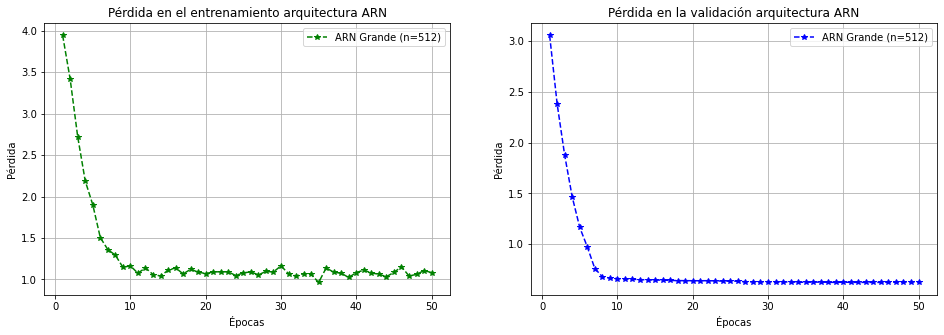

In [129]:
loss = history_rna.history['loss']
val_loss = history_rna.history['val_loss']
epochs = range(1, len(val_loss) + 1)

# Generar gráfica comparativa: pérdida en entrenamiento
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'g*--', label='ARN Grande (n=512)')
plt.title('Pérdida en el entrenamiento arquitectura ARN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc="upper center", fontsize="small")
plt.legend()
plt.grid(True)

# Generar gráfica comparativa: pérdida en validación
plt.subplot(1, 2, 2)
plt.plot(epochs, val_loss, 'b*--', label='ARN Grande (n=512)')
plt.title('Pérdida en la validación arquitectura ARN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc="upper center", fontsize="small")
plt.legend()
plt.grid(True)
plt.show()

### Exactitud

In [130]:
# check trined network so far on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test)# testeo de la red con los de prueba
print('\nExactitud evaluación:',test_acc)

900/900 [==============================] - 0s 23us/sample - loss: 0.6408 - acc: 0.6450

Exactitud evaluación: 0.645


In [131]:
Y_pred = model.predict_classes(X_test, batch_size=16, verbose=1)
Y_pred.shape

900/900 [==============================] - 0s 79us/sample


(900,)

### Recall

In [132]:
recall_score(Y_test, Y_pred, average='weighted')

0.43

### Matriz de confusión

In [133]:
#0: No accidentado
#1: accidentado

# Print the confusion matrix
cm = metrics.confusion_matrix(Y_test, Y_pred)
print(cm)

[[114 448]
 [ 65 273]]


In [134]:
# Mostrar la precisión, recall, F1-score
print("\n", metrics.classification_report(Y_test, Y_pred, digits=2))


               precision    recall  f1-score   support

           0       0.64      0.20      0.31       562
           1       0.38      0.81      0.52       338

    accuracy                           0.43       900
   macro avg       0.51      0.51      0.41       900
weighted avg       0.54      0.43      0.39       900



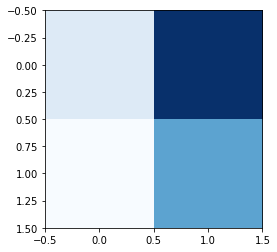

In [135]:
plt.imshow(cm, cmap='Blues', interpolation='None')
plt.show()